In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv('newprice.csv')

In [39]:
df.head(5)

,Company,Model,Location,Year,Kilometers_Driven,Power_bhp,Mileage_n,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,No_Year,Engine_CC
0,Honda,Jazz,Chennai,2011,46000,88.70,18.20,Petrol,Manual,First,5,8.61 Lakh,4.50,9,1199
1,Toyota,Innova,Mumbai,2016,36000,171.50,11.36,Diesel,Automatic,First,8,21 Lakh,17.50,4,2755
2,Maruti,Ciaz,Kochi,2018,25692,103.25,21.56,Petrol,Manual,First,5,10.65 Lakh,9.95,2,1462
3,Mitsubishi,Pajero,Delhi,2014,110000,175.56,13.50,Diesel,Manual,First,7,32.01 Lakh,15.00,6,2477
4,BMW,3 Series,Kochi,2014,32982,190.00,22.69,Diesel,Automatic,First,5,47.87 Lakh,18.55,6,1995


In [40]:
def clean_power(cols):
    for i in cols:
        t1 = str(i)
        temp = t1.split()
        if temp[0] == 'null' or temp[0] == 'nan':
            return None
#             pa/ss
        else:
            t2 = temp[0]
            t3 = float(t2)
            return t3

In [41]:
df['NP'] = df[['New_Price']].apply(clean_power, axis=1)

In [42]:
df.head()

,Company,Model,Location,Year,Kilometers_Driven,Power_bhp,Mileage_n,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,No_Year,Engine_CC,NP
0,Honda,Jazz,Chennai,2011,46000,88.70,18.20,Petrol,Manual,First,5,8.61 Lakh,4.50,9,1199,8.61
1,Toyota,Innova,Mumbai,2016,36000,171.50,11.36,Diesel,Automatic,First,8,21 Lakh,17.50,4,2755,21.00
2,Maruti,Ciaz,Kochi,2018,25692,103.25,21.56,Petrol,Manual,First,5,10.65 Lakh,9.95,2,1462,10.65
3,Mitsubishi,Pajero,Delhi,2014,110000,175.56,13.50,Diesel,Manual,First,7,32.01 Lakh,15.00,6,2477,32.01
4,BMW,3 Series,Kochi,2014,32982,190.00,22.69,Diesel,Automatic,First,5,47.87 Lakh,18.55,6,1995,47.87


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            824 non-null    object 
 1   Model              824 non-null    object 
 2   Location           824 non-null    object 
 3   Year               824 non-null    int64  
 4   Kilometers_Driven  824 non-null    int64  
 5   Power_bhp          803 non-null    float64
 6   Mileage_n          824 non-null    float64
 7   Fuel_Type          824 non-null    object 
 8   Transmission       824 non-null    object 
 9   Owner_Type         824 non-null    object 
 10  Seats              824 non-null    int64  
 11  New_Price          824 non-null    object 
 12  Price              824 non-null    float64
 13  No_Year            824 non-null    int64  
 14  Engine_CC          824 non-null    int64  
 15  NP                 824 non-null    float64
dtypes: float64(4), int64(5), o

In [44]:
def plot_corr(df):
    corrmap = df.corr()
    top_corr_feat = corrmap.index
    plt.figure(figsize=(10,10))
    g = sns.heatmap(df[top_corr_feat].corr(), annot=True, cmap='RdYlGn')

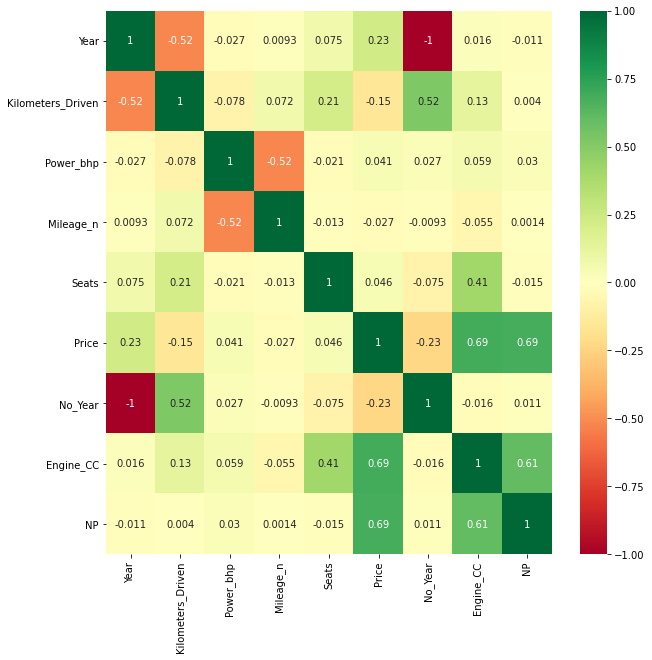

In [45]:
plot_corr(df)

In [46]:
df['Company'].value_counts()

Maruti           194
Hyundai           96
Toyota            82
Honda             68
BMW               57
Tata              43
Mercedes-Benz     42
Volkswagen        42
Renault           27
Mahindra          26
Ford              25
Audi              24
Skoda             19
Mini              16
Jeep              15
Nissan            15
Land              10
Datsun             7
Mitsubishi         6
Jaguar             4
Volvo              3
Isuzu              1
Fiat               1
Porsche            1
Name: Company, dtype: int64

In [47]:
comp_dict = dict(df['Company'].value_counts())

In [48]:
comp_dict

{'Maruti': 194,
 'Hyundai': 96,
 'Toyota': 82,
 'Honda': 68,
 'BMW': 57,
 'Tata': 43,
 'Mercedes-Benz': 42,
 'Volkswagen': 42,
 'Renault': 27,
 'Mahindra': 26,
 'Ford': 25,
 'Audi': 24,
 'Skoda': 19,
 'Mini': 16,
 'Jeep': 15,
 'Nissan': 15,
 'Land': 10,
 'Datsun': 7,
 'Mitsubishi': 6,
 'Jaguar': 4,
 'Volvo': 3,
 'Isuzu': 1,
 'Fiat': 1,
 'Porsche': 1}

In [49]:
df['Model'].value_counts()

Innova         44
Grand i10      38
Vitara         36
Wagon R        35
3 Series       31
               ..
New C-Class     1
Santro          1
Linea           1
Figo            1
A Class         1
Name: Model, Length: 106, dtype: int64

In [50]:
def add_comp_freq(cols):
    for i in cols:
        return comp_dict[i]

In [51]:
df['Comp_n'] = df[['Company']].apply(add_comp_freq, axis=1)

In [52]:
df

,Company,Model,Location,Year,Kilometers_Driven,Power_bhp,Mileage_n,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,No_Year,Engine_CC,NP,Comp_n
0,Honda,Jazz,Chennai,2011,46000,88.70,18.20,Petrol,Manual,First,5,8.61 Lakh,4.50,9,1199,8.61,68
1,Toyota,Innova,Mumbai,2016,36000,171.50,11.36,Diesel,Automatic,First,8,21 Lakh,17.50,4,2755,21.00,82
2,Maruti,Ciaz,Kochi,2018,25692,103.25,21.56,Petrol,Manual,First,5,10.65 Lakh,9.95,2,1462,10.65,194
3,Mitsubishi,Pajero,Delhi,2014,110000,175.56,13.50,Diesel,Manual,First,7,32.01 Lakh,15.00,6,2477,32.01,6
4,BMW,3 Series,Kochi,2014,32982,190.00,22.69,Diesel,Automatic,First,5,47.87 Lakh,18.55,6,1995,47.87,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Tata,Bolt,Chennai,2016,10000,181.04,14.74,Petrol,Manual,First,5,7.77 Lakh,4.00,4,1193,7.77,43
820,Volkswagen,Vento,Mumbai,2011,38000,67.10,18.90,Petrol,Manual,First,5,11.91 Lakh,3.25,9,1598,11.91,42
821,Maruti,Vitara,Pune,2016,37208,102.00,12.80,Diesel,Manual,First,5,9.93 Lakh,7.43,4,1248,9.93,194
822,Honda,Brio,Delhi,2013,33746,73.75,17.00,Petrol,Manual,First,5,6.63 Lakh,3.20,7,1198,6.63,68


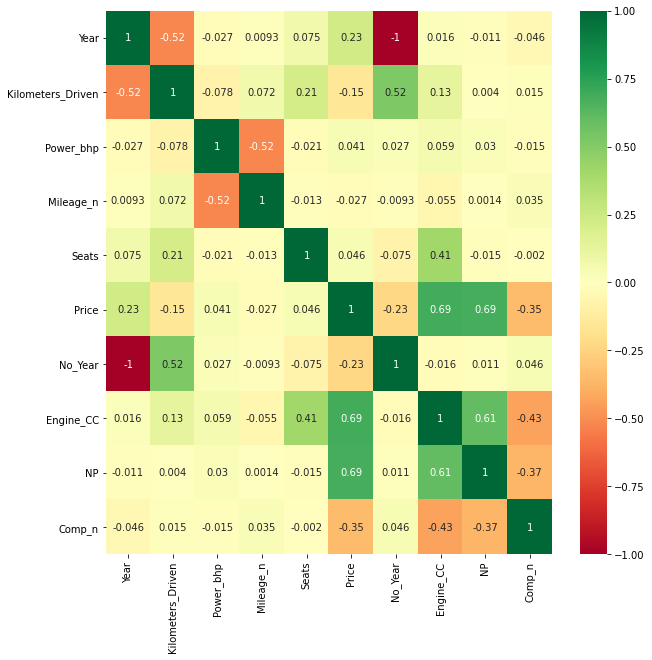

In [53]:
plot_corr(df)

In [54]:
emb = pd.get_dummies(df['Transmission'], drop_first=True)

In [55]:
df = pd.concat([df, emb], axis=1)

In [56]:
df

,Company,Model,Location,Year,Kilometers_Driven,Power_bhp,Mileage_n,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,No_Year,Engine_CC,NP,Comp_n,Manual
0,Honda,Jazz,Chennai,2011,46000,88.70,18.20,Petrol,Manual,First,5,8.61 Lakh,4.50,9,1199,8.61,68,1
1,Toyota,Innova,Mumbai,2016,36000,171.50,11.36,Diesel,Automatic,First,8,21 Lakh,17.50,4,2755,21.00,82,0
2,Maruti,Ciaz,Kochi,2018,25692,103.25,21.56,Petrol,Manual,First,5,10.65 Lakh,9.95,2,1462,10.65,194,1
3,Mitsubishi,Pajero,Delhi,2014,110000,175.56,13.50,Diesel,Manual,First,7,32.01 Lakh,15.00,6,2477,32.01,6,1
4,BMW,3 Series,Kochi,2014,32982,190.00,22.69,Diesel,Automatic,First,5,47.87 Lakh,18.55,6,1995,47.87,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Tata,Bolt,Chennai,2016,10000,181.04,14.74,Petrol,Manual,First,5,7.77 Lakh,4.00,4,1193,7.77,43,1
820,Volkswagen,Vento,Mumbai,2011,38000,67.10,18.90,Petrol,Manual,First,5,11.91 Lakh,3.25,9,1598,11.91,42,1
821,Maruti,Vitara,Pune,2016,37208,102.00,12.80,Diesel,Manual,First,5,9.93 Lakh,7.43,4,1248,9.93,194,1
822,Honda,Brio,Delhi,2013,33746,73.75,17.00,Petrol,Manual,First,5,6.63 Lakh,3.20,7,1198,6.63,68,1


In [57]:
emb = pd.get_dummies(df['Fuel_Type'], drop_first=True)

In [58]:
df = pd.concat([df, emb], axis=1)

In [59]:
df

,Company,Model,Location,Year,Kilometers_Driven,Power_bhp,Mileage_n,Fuel_Type,Transmission,Owner_Type,...,New_Price,Price,No_Year,Engine_CC,NP,Comp_n,Manual,Diesel,Electric,Petrol
0,Honda,Jazz,Chennai,2011,46000,88.70,18.20,Petrol,Manual,First,...,8.61 Lakh,4.50,9,1199,8.61,68,1,0,0,1
1,Toyota,Innova,Mumbai,2016,36000,171.50,11.36,Diesel,Automatic,First,...,21 Lakh,17.50,4,2755,21.00,82,0,1,0,0
2,Maruti,Ciaz,Kochi,2018,25692,103.25,21.56,Petrol,Manual,First,...,10.65 Lakh,9.95,2,1462,10.65,194,1,0,0,1
3,Mitsubishi,Pajero,Delhi,2014,110000,175.56,13.50,Diesel,Manual,First,...,32.01 Lakh,15.00,6,2477,32.01,6,1,1,0,0
4,BMW,3 Series,Kochi,2014,32982,190.00,22.69,Diesel,Automatic,First,...,47.87 Lakh,18.55,6,1995,47.87,57,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Tata,Bolt,Chennai,2016,10000,181.04,14.74,Petrol,Manual,First,...,7.77 Lakh,4.00,4,1193,7.77,43,1,0,0,1
820,Volkswagen,Vento,Mumbai,2011,38000,67.10,18.90,Petrol,Manual,First,...,11.91 Lakh,3.25,9,1598,11.91,42,1,0,0,1
821,Maruti,Vitara,Pune,2016,37208,102.00,12.80,Diesel,Manual,First,...,9.93 Lakh,7.43,4,1248,9.93,194,1,1,0,0
822,Honda,Brio,Delhi,2013,33746,73.75,17.00,Petrol,Manual,First,...,6.63 Lakh,3.20,7,1198,6.63,68,1,0,0,1


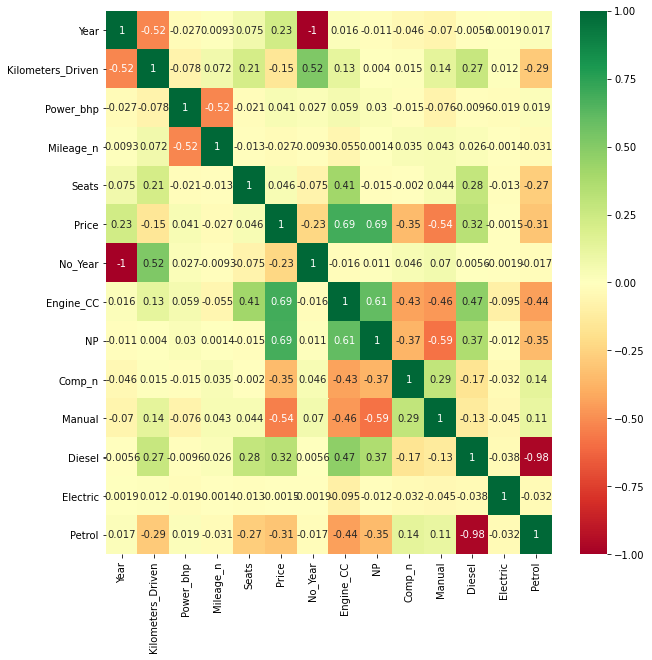

In [60]:
plot_corr(df)

In [63]:
df.columns

Index(['Company', 'Model', 'Location', 'Year', 'Kilometers_Driven',
       'Power_bhp', 'Mileage_n', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'New_Price', 'Price', 'No_Year', 'Engine_CC', 'NP', 'Comp_n',
       'Manual', 'Diesel', 'Electric', 'Petrol'],
      dtype='object')

In [106]:
df.dropna(inplace=True)

In [107]:
X = df[['Year','Power_bhp','Seats','Engine_CC','Comp_n','Manual', 'Diesel', 'Electric', 'Petrol']]
y = df['NP']

In [108]:
X

,Year,Power_bhp,Seats,Engine_CC,Comp_n,Manual,Diesel,Electric,Petrol
0,2011,88.70,5,1199,68,1,0,0,1
1,2016,171.50,8,2755,82,0,1,0,0
2,2018,103.25,5,1462,194,1,0,0,1
3,2014,175.56,7,2477,6,1,1,0,0
4,2014,190.00,5,1995,57,0,1,0,0
...,...,...,...,...,...,...,...,...,...
819,2016,181.04,5,1193,43,1,0,0,1
820,2011,67.10,5,1598,42,1,0,0,1
821,2016,102.00,5,1248,194,1,1,0,0
822,2013,73.75,5,1198,68,1,0,0,1


In [109]:
y

0       8.61
1      21.00
2      10.65
3      32.01
4      47.87
       ...  
819     7.77
820    11.91
821     9.93
822     6.63
823     7.88
Name: NP, Length: 803, dtype: float64

<AxesSubplot:>

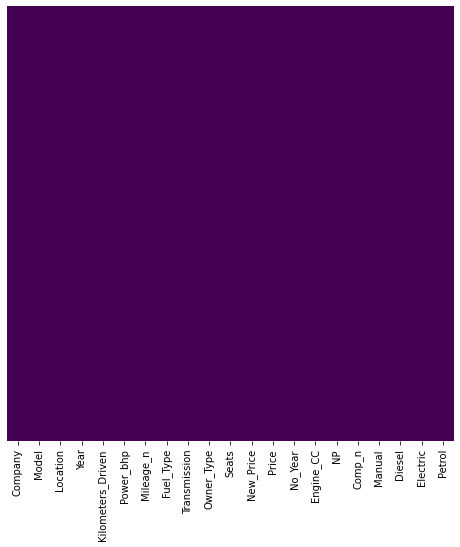

In [110]:
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)

In [111]:
df

,Company,Model,Location,Year,Kilometers_Driven,Power_bhp,Mileage_n,Fuel_Type,Transmission,Owner_Type,...,New_Price,Price,No_Year,Engine_CC,NP,Comp_n,Manual,Diesel,Electric,Petrol
0,Honda,Jazz,Chennai,2011,46000,88.70,18.20,Petrol,Manual,First,...,8.61 Lakh,4.50,9,1199,8.61,68,1,0,0,1
1,Toyota,Innova,Mumbai,2016,36000,171.50,11.36,Diesel,Automatic,First,...,21 Lakh,17.50,4,2755,21.00,82,0,1,0,0
2,Maruti,Ciaz,Kochi,2018,25692,103.25,21.56,Petrol,Manual,First,...,10.65 Lakh,9.95,2,1462,10.65,194,1,0,0,1
3,Mitsubishi,Pajero,Delhi,2014,110000,175.56,13.50,Diesel,Manual,First,...,32.01 Lakh,15.00,6,2477,32.01,6,1,1,0,0
4,BMW,3 Series,Kochi,2014,32982,190.00,22.69,Diesel,Automatic,First,...,47.87 Lakh,18.55,6,1995,47.87,57,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Tata,Bolt,Chennai,2016,10000,181.04,14.74,Petrol,Manual,First,...,7.77 Lakh,4.00,4,1193,7.77,43,1,0,0,1
820,Volkswagen,Vento,Mumbai,2011,38000,67.10,18.90,Petrol,Manual,First,...,11.91 Lakh,3.25,9,1598,11.91,42,1,0,0,1
821,Maruti,Vitara,Pune,2016,37208,102.00,12.80,Diesel,Manual,First,...,9.93 Lakh,7.43,4,1248,9.93,194,1,1,0,0
822,Honda,Brio,Delhi,2013,33746,73.75,17.00,Petrol,Manual,First,...,6.63 Lakh,3.20,7,1198,6.63,68,1,0,0,1


In [112]:
df.shape

(803, 21)

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [115]:
X_train.shape

(602, 9)

In [116]:
X_test.shape

(201, 9)

In [135]:
# from sklearn.linear_model import R

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rf = RandomForestRegressor(n_estimators=100)

In [142]:
X

,Year,Power_bhp,Seats,Engine_CC,Comp_n,Manual,Diesel,Electric,Petrol
0,2011,88.70,5,1199,68,1,0,0,1
1,2016,171.50,8,2755,82,0,1,0,0
2,2018,103.25,5,1462,194,1,0,0,1
3,2014,175.56,7,2477,6,1,1,0,0
4,2014,190.00,5,1995,57,0,1,0,0
...,...,...,...,...,...,...,...,...,...
819,2016,181.04,5,1193,43,1,0,0,1
820,2011,67.10,5,1598,42,1,0,0,1
821,2016,102.00,5,1248,194,1,1,0,0
822,2013,73.75,5,1198,68,1,0,0,1


In [146]:
X.drop(['Manual', 'Diesel','Electric','Petrol'], axis=1,inplace=True)

/home/aditya/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
X

,Year,Power_bhp,Seats,Engine_CC,Comp_n
0,2011,88.70,5,1199,68
1,2016,171.50,8,2755,82
2,2018,103.25,5,1462,194
3,2014,175.56,7,2477,6
4,2014,190.00,5,1995,57
...,...,...,...,...,...
819,2016,181.04,5,1193,43
820,2011,67.10,5,1598,42
821,2016,102.00,5,1248,194
822,2013,73.75,5,1198,68


In [147]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
y_pred = rf.predict(X_test)

In [149]:
confusion_matrix(y_test, y_pred)

ValueError: continuous is not supported